# WS2332 - Project 7 - Lab Session 4: **Bayesian Optimization**
## Step 0: This is how it looks like

Here you can see Bayesian optimization in action for a (1D, noiseless) problem (gif source: Wikipedia). 

A quick explanation about what the most important things mean in each step of this animation:

In the top figure:
*   The **black line** represents the ground truth function $f(x)$.
*   The **purple line** represents the predictive mean $\mu_*$.
*   The **purple band** represents the 95% confidence interval; its width is twice the predictive standard deviation $\sigma_*$.

In the bottom three figures:
*   The **cyan line** represents a specific acquisition function $\text{acq}(x)$. In these cases: EI, UCB and PI respectively.
*   The **yellow diamond** represents the maximum value of the acquisition function. The argument at which this happens is the predictive / test point $x_*$ for the next step of the iteration.




![](https://upload.wikimedia.org/wikipedia/commons/0/02/GpParBayesAnimationSmall.gif)

---
## Step 1: Install GPyOpt

This following command will install [GPyOpt](https://sheffieldml.github.io/GPyOpt/). Be sure to do this before you proceed to the next steps.

In [0]:
pip install GPyOpt



---


# Step 2: Simple problem (1D)

Let's first import the Python packages that are needed to do run some basic tasks. You only need to do this once per session. As a recap:

*   [NumPy](https://numpy.org/) is a package that allows us a lot of freedom to do mathematical manipulations. This includes standard functions such as sine, cosine and exponential functions, but also (pseudo-)random number generation with or without a given seed.
*   [SciPy](https://docs.scipy.org/doc/scipy/reference/) is a package containing additional routines such as common function optimization algorithms.
*   [Matplotlib](https://matplotlib.org/) is a package that governs visualizing objects Python. We use it to plot our graphs. 



In [0]:
# --- Load GPyOpt + other packages
from GPyOpt.methods import BayesianOptimization
import numpy as np
import scipy.optimize as so
from matplotlib import pyplot as plt

Now we're ready to tackle our first problem. Find the minimum value of $f(x)=x\sin(x)$ on the interval $I=[-3, 3]$. 

This should be $\min_{x\in I}f(x)=0$, attained at $x=0$.

We will also compare the overall approximation of the function with the true function, and compare the performance of BO versus another common derivative-free optimization algorithm called [Nelder-Mead](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method).

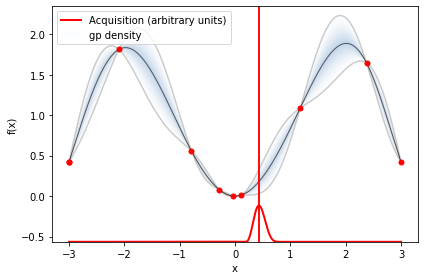

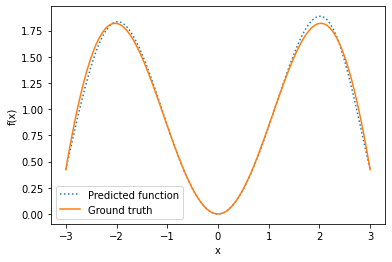

Next acquisition minimizing argument: 
[[0.43269493]]

Progression of the approximated minimum function value:
[[1.08940672e+00]
 [4.24749624e-01]
 [4.23360024e-01]
 [4.23360024e-01]
 [4.23360024e-01]
 [7.99465379e-02]
 [7.99465379e-02]
 [1.28826821e-02]
 [1.06393564e-03]
 [1.06393564e-03]]

N-M optimized value after 10 function evaluations: 0.00998334166468301


In [0]:
# --- Fixed seed for consistent results
np.random.seed(123)

# --- Define your problem
def f(x): return x * np.sin(x)
domain = [{'type': 'continuous', 'domain': (-3, 3)}]

# --- Solve your problem
numberOfInitialPoints = 1
numberOfIterations = 9

myBopt = BayesianOptimization(f=f, acquisition_type='EI', domain=domain, normalize_Y=False, initial_design_numdata=numberOfInitialPoints)
myBopt.run_optimization(max_iter=numberOfIterations)
myBopt.plot_acquisition()

# --- Comparing the ground truth with the approximated function
xgrid = np.linspace(-3, 3, 100).reshape((100, 1))
plt.plot(xgrid, myBopt.model.model.predict(xgrid)[0], ':', label='Predicted function')
plt.plot(xgrid, f(xgrid), label='Ground truth')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# --- Printing some interesting stuff
print("Next acquisition minimizing argument: ")
print(myBopt.suggest_next_locations())
print()

print("Progression of the approximated minimum function value:")
print(myBopt.Y_best.reshape((len(myBopt.Y_best), 1)))
print()

# --- Compare with Nelder-Mead optimization
NMmaxiter = int((numberOfInitialPoints + numberOfIterations) / 2)
nmopt = so.minimize(fun=f, x0=1, method='Nelder-Mead', bounds=(-3, 3), options={'maxiter': NMmaxiter})
print('N-M optimized value after', 2 * NMmaxiter, 'function evaluations:', nmopt.fun)
# print(nmopt)

# Step 3: Not-so simple problem (1D)

We are now ready to look at a function that has a more irregular landscape. Let's consider the **Ackley function**, which is defined as
$$A(x)=20(1-e^{-|x|/5})-e^{\cos(2\pi x)}+e.$$

This function has a unique global minimum is located at $x=0$ with $A(0)=0$.


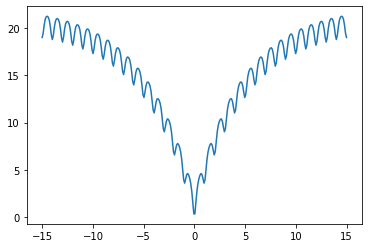

In [0]:
# --- Your code here to define the Ackley function and to plot it (optional). Suggested: between -15 and 15 with 300 grid points.

def A(x): return 20 * (1 - np.exp(-np.abs(x) / 5)) - np.exp(np.cos(2 * np.pi * x)) + np.e

xgrid = np.linspace(-15, 15, 300)
plt.plot(xgrid, A(xgrid))
plt.show()

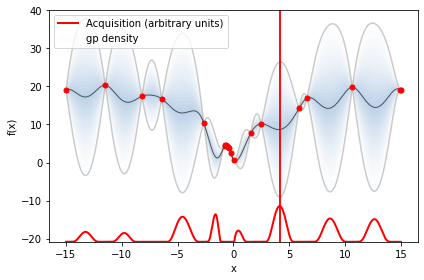

Next acquisition minimizing argument: 
[[4.14882128]]

Progression of the approximated minimum function value:
[[14.3695435 ]
 [14.3695435 ]
 [14.3695435 ]
 [ 7.63904565]
 [ 7.63904565]
 [ 7.63904565]
 [ 7.63904565]
 [ 7.63904565]
 [ 7.63904565]
 [ 4.53406983]
 [ 2.47545424]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]
 [ 0.58144499]]

 final_simplex: (array([[0.96855469],
       [0.96835938]]), array([3.57445217, 3.57445257]))
           fun: 3.57445216935448
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 20
           nit: 10
        status: 2
       success: False
             x: array([0.96855469])


In [0]:
# --- Fixed seed for consistent results
np.random.seed(123)

# -- Your code here to run Bayesian optimization to find the minimum A(x). Suggested: 

domainA = [{'type': 'continuous', 'domain': (-15, 15)}]

# --- Solve your problem
numberOfInitialPoints = 5
numberOfIterations = 15

myBoptA = BayesianOptimization(f=A, acquisition_type='EI', domain=domainA, normalize_Y=False, initial_design_numdata=numberOfInitialPoints)
myBoptA.run_optimization(max_iter=numberOfIterations)
myBoptA.plot_acquisition()

# --- Printing some interesting stuff
print("Next acquisition minimizing argument: ")
print(myBoptA.suggest_next_locations())
print()

print("Progression of the approximated minimum function value:")
print(myBoptA.Y_best.reshape((len(myBoptA.Y_best), 1)))
print()

NMmaxiter = int((numberOfInitialPoints + numberOfIterations) / 2)
nmopt = so.minimize(fun=A, x0=1, method='Nelder-Mead', bounds=(-15, 15), options={'maxiter': NMmaxiter})
print(nmopt)

# Step 4: 2D problem

Let's have a look at optimizing a function with two continuous variables. In particular, we will analyze how BO handles a notoriously difficult function to optimize: the **Rosenbrock function**, defined as
$$R(x,y)=(1-x)^2+100(y-x^2)^2.$$
This function also has a unique global minimum located at $(x,y)=(1,1)$ with value $R(1,1)=0$.

The Nelder-Mead optimization process for the Rosenbrock function (gif source: Wikipedia):

![](https://i.imgur.com/V6EF7Sm.gif)

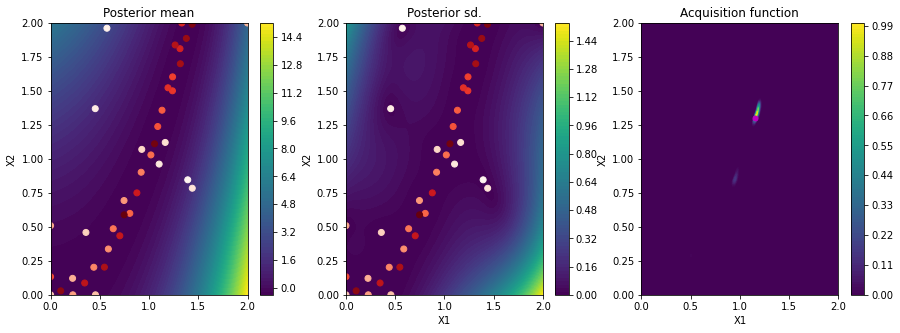

N-M optimized value after 40 function evaluations: 0.02068340433907423


In [0]:
# --- Fixed seed for consistent results
np.random.seed(123)

# --- Define your problem
def Rbase(x, y): return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
def R(x): return Rbase(x[:, 0], x[:, 1])

def RNM(x): return Rbase(x[0], x[1])
domainR = [{'name': 'x', 'type': 'continuous', 'domain': (0, 2)},
           {'name': 'y', 'type': 'continuous', 'domain': (0, 2)}]
            
# --- Solve your problem
numberOfInitialPoints = 5
numberOfIterations = 35

myBoptR = BayesianOptimization(f=R, acquisition_type='EI', domain=domainR, normalize_Y=True, initial_design_numdata=numberOfInitialPoints)
myBoptR.run_optimization(max_iter=numberOfIterations)
myBoptR.plot_acquisition()

# --- Compare with Nelder-Mead optimization
bounds = so.Bounds([0, 0], [2, 2])
x0 = np.array([0.5, 0.5])

NMmaxiter = int((numberOfInitialPoints + numberOfIterations) / 2)
nmopt = so.minimize(fun=RNM, x0=x0, method='Nelder-Mead', bounds=bounds, options={'maxiter': NMmaxiter})
print('N-M optimized value after', 2 * NMmaxiter, 'function evaluations:', nmopt.fun)

BAYESIAN OPTIMIZATION
Iter    X1          X2            f(X)     
   1    1.392938    0.846213    119.852089
   2    0.572279    1.961528    267.186886
   3    0.453703    1.369659    135.744545
   4    1.102630    0.961864    6.458481
   5    1.438938    0.784235    165.651328
   6    1.164202    1.121141    5.513137
   7    0.926114    1.069990    4.512720
   8    0.359097    0.458988    11.303249
   9    0.000000    0.000000    1.000000
  10    0.455993    0.000000    4.619405
  11    2.000000    2.000000    401.000000
  12    0.223481    0.121135    1.109793
  13    0.000000    0.509076    26.915840
  14    0.226192    0.000000    0.860543
  15    0.746074    0.693718    1.943887
  16    0.586834    0.337143    0.175935
  17    0.439135    0.202707    0.324307
  18    0.919994    0.901881    0.314333
  19    0.636219    0.486285    0.796725
  20    1.018883    1.029219    0.008285
  21    0.804866    0.599211    0.274263
  22    1.131843    1.358207    0.612422
  23    1.088282    

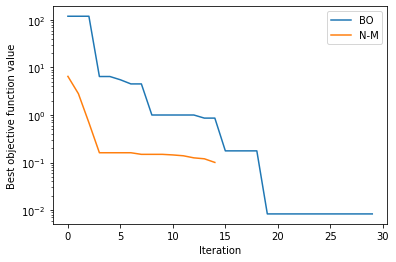

In [0]:
print ('BAYESIAN OPTIMIZATION')
print ( '{0:4s}   {1:9s}   {2:9s}      {3:9s}'.format('Iter', ' X1', ' X2', 'f(X)')   )
for i in range(numberOfInitialPoints+numberOfIterations):
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(i+1, myBoptR.X[i,0], myBoptR.X[i,1], myBoptR.Y[i,0]))
print('Bayesian optimized value after', numberOfInitialPoints+numberOfIterations, 'function evaluations:', myBoptR.Y_best[-1])


print ()

# --- Compare with Nelder-Mead optimization


bounds = so.Bounds([0, 0], [2, 2])
x0 = np.array([0.5, 0.5])
xxi = [np.array([x0[0],x0[1],RNM(x0)])]


Nfeval = 1


print ('NELDER-MEAD')
print ( '{0:4s}   {1:9s}   {2:9s}      {3:9s}'.format('Iter', ' X1', ' X2', 'f(X)')   )

print ('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, x0[0], x0[1], RNM(x0)))

def callbackF(Xi):
    xxi.append(np.array([Xi[0],Xi[1],RNM(Xi)]))
    global Nfeval
    Nfeval += 1
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(Nfeval, Xi[0], Xi[1], RNM(Xi)))


NMmaxiter = int((numberOfInitialPoints + numberOfIterations) / 2)
nmopt = so.minimize(fun=RNM, x0=x0, callback=callbackF, method='Nelder-Mead', bounds=bounds, options={'maxiter': NMmaxiter})
print('N-M optimized value after', 2 * NMmaxiter, 'function evaluations:', nmopt.fun)
# print(nmopt)


xxi = np.array(xxi)


# ---- Plotting #

plt.figure(0)
plt.plot(myBoptR.Y_best, label='BO')
plt.plot(xxi[:,-1], label='N-M')
plt.yscale('log')
plt.ylabel('Best objective function value')
plt.xlabel('Iteration')
plt.legend()
plt.show()


# Step 5: higher-dimensional problems

Let's move on to higher dimensional problems. The **$d$-dimensional Ackley function** is given by
$$A(x_1,x_2,\ldots,x_n)=20\left(1-\exp\left(-\frac15\sqrt{\frac1d\sum_{i=1}^dx_i^2}\right)\right)-\exp\left(\frac1d\sum_{i=1}^d\cos(2\pi x_i)\right)+e.$$

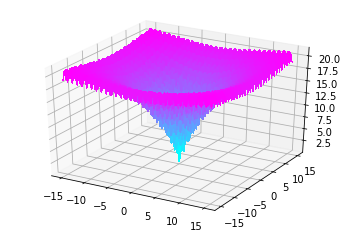

In [0]:
from matplotlib import cm

def Ad(x, d):
  # print(np.sum(x ** 2, 1))
  return 20 * (1 - np.exp(-np.sqrt(np.sum(x ** 2, 1) / d) / 5)) - np.exp(np.sum(np.cos(2 * np.pi * x), 1) / d) + np.e

xgrid = np.linspace(-15, 15, 300)
ygrid = np.linspace(-15, 15, 300)
X, Y = np.meshgrid(xgrid, ygrid)
inpoints = np.array([X, Y]).reshape(2, -1).T
outpoints = np.reshape(Ad(inpoints, 2), np.shape(X))

# print(inpoints)
# print(np.shape(inpoints))
# print(Ad(inpoints, 2))
# print(np.shape(Ad(inpoints, 2)))
# print(outpoints)
# print(np.shape(outpoints))

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, outpoints, cmap=cm.cool,
                       linewidth=0, antialiased=False)

[[ 5.89407557 -2.3068062 ]]
[[-6.41581995 14.42292595]]
[[-8.19445639  5.54489216]]
[[ 1.53944307 -0.57204296]]
[[ 6.58406909 -3.23647445]]
[[ 15. -15.]]
[[-14.92829363 -14.98329231]]
[[13.57489629 14.67878985]]
[[ 14.23427221 -14.62956475]]
[[-14.42152853  14.85576405]]
[[ 12.82243287 -14.77936228]]
[[-14.76947138 -14.68197573]]
[[14.74387732 14.56607758]]
[[-14.87762746 -14.65001307]]
[[14.65570755 14.74085303]]
[[-1.41075837 -2.13712176]]
[[0.50687763 1.90393589]]
[[0.34393675 0.70754981]]
[[0.09834029 1.08705247]]
[[-0.09980719  1.4978085 ]]
[[-0.01334616  1.29770872]]
[[-0.08276031  1.26630885]]
[[-0.17271044  1.21972798]]
[[-0.2741141   1.15310064]]
[[-0.37365483  1.07224367]]
[[-0.46963264  0.98321246]]
[[-0.55999417  0.88595526]]
[[-0.62554064  0.78398765]]
[[-0.62989256  0.70081451]]
[[-0.5919672  0.6451858]]


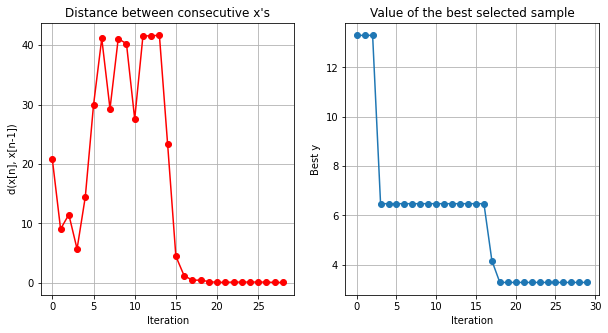

In [0]:
import GPyOpt
# --- Fixed seed for consistent results
np.random.seed(123)

# --- Define your problem
funcAd = GPyOpt.objective_examples.experimentsNd.ackley(input_dim=2) 
domainAd = [{'type': 'continuous', 'domain': (-15, 15)},
            {'type': 'continuous', 'domain': (-15, 15)}]

# --- Solve your problem
numberOfInitialPoints = 5
numberOfIterations = 25

myBoptAd = BayesianOptimization(f=funcAd.f, acquisition_type='EI', domain=domainAd, normalize_Y=False, initial_design_numdata=numberOfInitialPoints)
myBoptAd.run_optimization(max_iter=numberOfIterations)
myBoptAd.plot_convergence()